In [73]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import MinMaxScaler


In [74]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","level"]

In [75]:
train = pd.read_csv('KDDTrain.txt', header=None, names = col_names)
test = pd.read_csv('KDDTest.txt', header=None, names = col_names)

In [76]:
train.drop(['level'], axis=1, inplace=True)
test.drop(['level'], axis=1, inplace=True)

In [77]:
train.shape

(125973, 42)

In [78]:
test.shape

(22544, 42)

In [79]:
train['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [80]:

train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [81]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [82]:
train = train.dropna('columns')
test = test.dropna('columns')

In [83]:
train.shape

(125973, 42)

In [84]:
test.shape

(22544, 42)

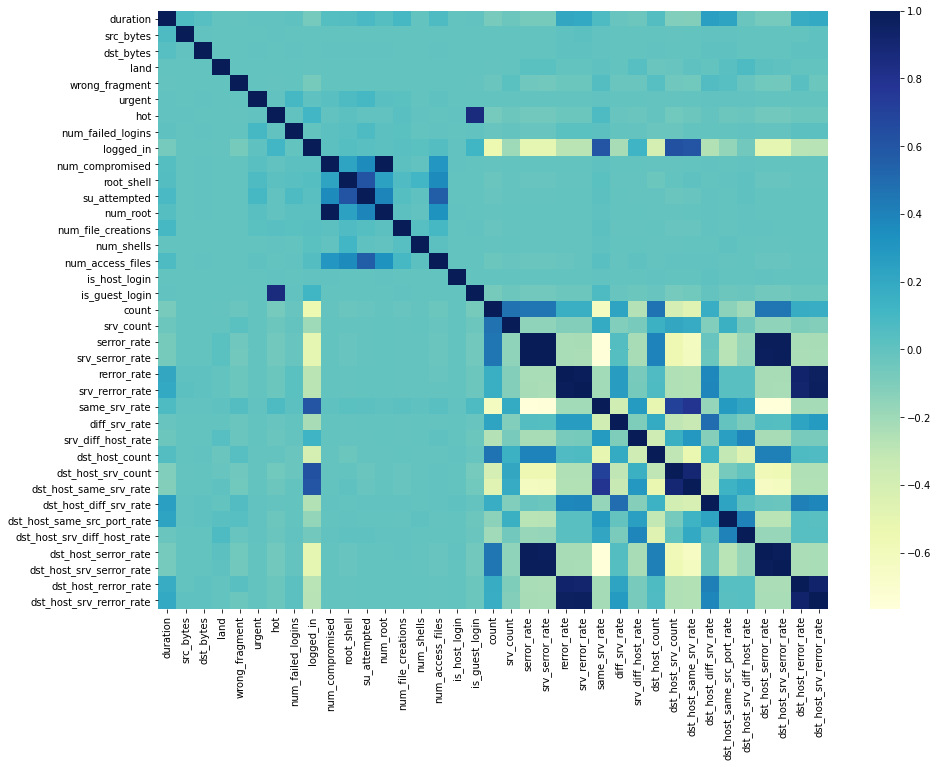

In [85]:
train = train[[col for col in train if train[col].nunique() > 1]]
test = test[[col for col in test if test[col].nunique() > 1]]
corr = train.corr()

plt.figure(figsize=(15,11))

sns.heatmap(corr, cmap ="YlGnBu")

plt.show()

In [86]:
train['num_root'].corr(train['num_compromised'])

0.9988334525784739

In [87]:
train['srv_serror_rate'].corr(train['serror_rate'])

0.993289242537003

In [88]:
train['is_guest_login'].corr(train['hot'])

0.8602881047178803

In [89]:
train['srv_rerror_rate'].corr(train['rerror_rate'])

0.9890076529819669

In [90]:
train['dst_host_serror_rate'].corr(train['serror_rate'])

0.9793730829838588

In [91]:
train['dst_host_rerror_rate'].corr(train['rerror_rate'])

0.9267485035758946

In [92]:
train['dst_host_srv_rerror_rate'].corr(train['rerror_rate'])

0.9644486655035205

In [93]:
train['dst_host_srv_serror_rate'].corr(train['serror_rate'])

0.9811389586176396

In [94]:
train['dst_host_srv_serror_rate'].corr(train['srv_serror_rate'])

0.9862517164932106

In [95]:
train['dst_host_srv_serror_rate'].corr(train['dst_host_serror_rate'])

0.9850522227998091

In [96]:
train['dst_host_srv_serror_rate'].corr(train['srv_serror_rate'])

0.9862517164932106

In [97]:
train.drop('num_root',axis = 1,inplace = True)
test.drop('num_root',axis = 1,inplace = True)

train.drop('srv_serror_rate',axis = 1,inplace = True)
test.drop('srv_serror_rate',axis = 1,inplace = True)

train.drop('srv_rerror_rate',axis = 1, inplace=True)
test.drop('srv_rerror_rate',axis = 1, inplace=True)

train.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
test.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

In [98]:
train.shape

(125973, 37)

In [99]:
test.shape

(22544, 37)

In [100]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,0.00,0.00,neptune


In [101]:
test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.83,0.71,mscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.07,0.07,back
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,normal


In [102]:
train['protocol_type'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [103]:
protocol_type_train= pd.get_dummies(train['protocol_type'], dtype=int)
protocol_type_test= pd.get_dummies(test['protocol_type'], dtype=int)

In [104]:
train.drop(['protocol_type'], axis=1, inplace=True)
test.drop(['protocol_type'], axis=1, inplace=True)

In [105]:
train = pd.concat([protocol_type_train, train], axis = 1)
test = pd.concat([protocol_type_test, test], axis = 1)

In [106]:
train.shape


(125973, 39)

In [107]:
test.shape

(22544, 39)

In [108]:
train['flag'].value_counts()

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

In [109]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
train['flag'] = train['flag'].map(fmap)
test['flag'] = test['flag'].map(fmap)

In [110]:
train['service'].value_counts()

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
harvest          2
aol              2
http_2784        1
Name: service, Length: 70, dtype: int64

In [111]:
train.drop('service',axis = 1,inplace= True)
test.drop('service',axis = 1,inplace= True)

In [112]:
test.shape

(22544, 38)

In [113]:
train.dtypes

icmp                             int32
tcp                              int32
udp                              int32
duration                         int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate            

In [114]:
Y_train = train[['label']]
Y_test = test[['label']]

In [115]:
Y_train = np.where(Y_train=='normal',0,1)
Y_test = np.where(Y_test=='normal',0,1)

In [116]:
Y_train

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [117]:
X_train = train.drop(['label',], axis=1)
X_test = test.drop(['label',], axis=1)

In [118]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [119]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(125973, 37) (22544, 37)
(125973, 1) (22544, 1)


In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.33)

In [121]:
from keras import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [122]:
def function():
    classifier = Sequential()
#First Hidden Layer
    classifier.add(Dense(37, input_dim =37, activation='relu', kernel_initializer='random_uniform'))

#Second  Hidden Layer




    classifier.add(Dense(20, activation='relu', kernel_initializer='random_normal'))

    classifier.add(Dense(15, activation='relu', kernel_initializer='random_normal'))
    classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal'))
    classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal'))
    classifier.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    #5 classes-normal,dos,probe,r2l,u2r
    #classifier.add(Dense(1,activation='softmax'))
    classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
    return classifier

In [123]:
model = KerasClassifier(build_fn=function,epochs=100,batch_size=64)


In [124]:
start = time.time()
model.fit(X_train, Y_train)
end = time.time()

Epoch 1/100
1319/1319 [==============================] - 1s 665us/step - loss: 0.3506 - accuracy: 0.7897
Epoch 2/100
1319/1319 [==============================] - 1s 651us/step - loss: 0.0686 - accuracy: 0.9757
Epoch 3/100
1319/1319 [==============================] - 1s 638us/step - loss: 0.0541 - accuracy: 0.9801
Epoch 4/100
1319/1319 [==============================] - 1s 666us/step - loss: 0.0431 - accuracy: 0.9852
Epoch 5/100
1319/1319 [==============================] - 1s 637us/step - loss: 0.0387 - accuracy: 0.9866
Epoch 6/100
1319/1319 [==============================] - 1s 643us/step - loss: 0.0339 - accuracy: 0.9881
Epoch 7/100
1319/1319 [==============================] - 1s 656us/step - loss: 0.0324 - accuracy: 0.9883
Epoch 8/100
1319/1319 [==============================] - 1s 650us/step - loss: 0.0302 - accuracy: 0.9891
Epoch 9/100
1319/1319 [==============================] - 1s 663us/step - loss: 0.0288 - accuracy: 0.9899
Epoch 10/100
1319/1319 [==============================]

In [126]:
start_time = time.time()
Y_test_pred = model.predict(X_test)
end_time = time.time()

In [127]:
start_time = time.time()
Y_train_pred = model.predict(X_train)
end_time = time.time()

In [128]:
accuracy_score(Y_train,Y_train_pred)

0.9961137901209701

In [129]:
accuracy_score(Y_test,Y_test_pred)

0.994130664870586

In [130]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [131]:
model1 = GaussianNB()

In [136]:
start_time = time.time()
model1.fit(X_train, Y_train.ravel())
end_time = time.time()

In [137]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

In [138]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.9165057286051113
Test score is: 0.9172038872317906


In [139]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [140]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [144]:
model2.fit(X_train, Y_train.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [145]:
Y_test_pred2 = model2.predict(X_test)

In [146]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9634483003755879
Test score is: 0.9640864043105937


In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
model3 = RandomForestClassifier(n_estimators=30)

In [150]:
model3.fit(X_train, Y_train.ravel())

RandomForestClassifier(n_estimators=30)

In [151]:
Y_test_pred3 = model3.predict(X_test)

In [152]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.9997393395812846
Test score is: 0.9974742615221784


In [153]:
from sklearn.svm import SVC

In [154]:
model4 = SVC(gamma = 'scale')

In [155]:
model4.fit(X_train, Y_train.ravel())

SVC()

In [156]:
Y_test_pred4 = model4.predict(X_test)

In [157]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

Train score is: 0.983128161988602
Test score is: 0.9822476666987395


In [158]:
from sklearn.linear_model import LogisticRegression

In [159]:
model5 = LogisticRegression(max_iter=1200000)

In [160]:
model5.fit(X_train, Y_train.ravel())

LogisticRegression(max_iter=1200000)

In [161]:
Y_test_pred5 = model5.predict(X_test)

In [162]:
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))

Train score is: 0.9545621497375624
Test score is: 0.953285865486385


In [163]:
from sklearn.ensemble import GradientBoostingClassifier

In [164]:
model6 = GradientBoostingClassifier(random_state=0)

In [165]:
model6.fit(X_train, Y_train.ravel())

GradientBoostingClassifier(random_state=0)

In [166]:
Y_test_pred6 = model6.predict(X_test)

In [167]:
print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test,Y_test))

Train score is: 0.9897394580632931
Test score is: 0.9892235158279611


1319/1319 [==============================] - 1s 379us/step - loss: 0.0097 - accuracy: 0.9961


<BarContainer object of 7 artists>

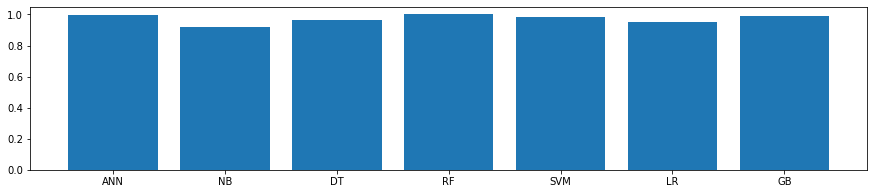

In [169]:
names = ['ANN','NB','DT','RF','SVM','LR','GB']
values = [model.score(X_train, Y_train),model1.score(X_train, Y_train),model2.score(X_train, Y_train),model3.score(X_train, Y_train),model4.score(X_train, Y_train),model5.score(X_train, Y_train),model6.score(X_train, Y_train)]
f = plt.figure(figsize=(15,3),num=10)
#plt.subplot(131)
#plt.ylim(80,102)
plt.bar(names,values)

650/650 [==============================] - 0s 403us/step - loss: 0.0209 - accuracy: 0.9941


<BarContainer object of 7 artists>

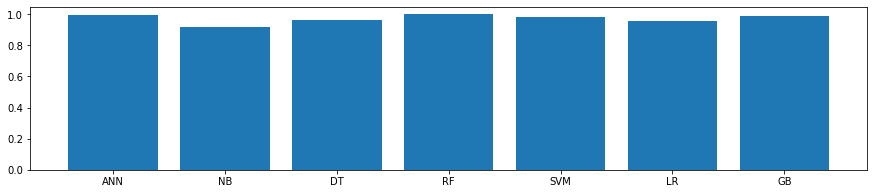

In [170]:
names = ['ANN','NB','DT','RF','SVM','LR','GB']
values = [model.score(X_test,Y_test),model1.score(X_test,Y_test),model2.score(X_test,Y_test),model3.score(X_test,Y_test),model4.score(X_test,Y_test),model5.score(X_test,Y_test),model6.score(X_test,Y_test)]
f = plt.figure(figsize=(15,3),num=10)
#plt.subplot(131)
#plt.ylim(80,102)
plt.bar(names,values)